<a href="https://colab.research.google.com/github/SyedHashir-Helper/Classification-of-Web-Documents/blob/main/Classification_of_Web_Documents_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
!pip install pyspellchecker
from spellchecker import SpellChecker


import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def correct_spelling(text):
    spell = SpellChecker()
    corrected_words = [spell.correction(word) for word in text.split()]
    corrected_text = ' '.join(corrected_words)
    return corrected_text

In [ ]:
def tokenization(text):
  return word_tokenize(text)

In [ ]:
def stemming(tokens):
  ps = PorterStemmer()
  cleaned_tokens = [ps.stem(token) for token in tokens if token.isalpha() and token.lower() not in stopwords.words('english')]
  return cleaned_tokens

In [ ]:
def preprocessDocument(text):
  tokens = tokenization(text)
  preprocessedTokens = stemming(tokens)
  return preprocessedTokens

In [ ]:
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')

def getSynonymsAndAntonyms(word):
    synonyms = []
    antonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace('_', ' ')
            if synonym not in synonyms:
                synonyms.append(synonym)
            for antonym in lemma.antonyms():
                antonym_name = antonym.name().replace('_', ' ')
                if antonym_name not in antonyms:
                    antonyms.append(antonym_name)
    return synonyms, antonyms

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def tokensToGraph(preprocessedTokens):
  DiGraph = nx.DiGraph()
  for i in range(len(preprocessedTokens)):
    if i != len(preprocessedTokens) - 1 :
        DiGraph.add_edge(preprocessedTokens[i], preprocessedTokens[i + 1])
    synonyms,antonyms = getSynonymsAndAntonyms(preprocessedTokens[i])
    for j in synonyms:
      if(len(j.split(" ")) == 1):
        DiGraph.add_edge(preprocessedTokens[i], j)
    for k in synonyms:
      if(len(k.split(" ")) == 1):
        DiGraph.add_edge(preprocessedTokens[i], k)
  return DiGraph

In [ ]:
def commonEdgesThroughIntersection(G1, G2):
  common_edges = set(G1.edges).intersection(G2.edges)
  similarity = len(common_edges) / ((len(G1.edges) + len(G2.edges) - len(common_edges)))
  return similarity

In [ ]:
def jaccard_similarity(G1, G2):
    node_intersection = set(G1.nodes()) & set(G2.nodes())
    node_union = set(G1.nodes()) | set(G2.nodes())
    node_similarity = len(node_intersection) / len(node_union)

    edge_intersection = set(G1.edges()) & set(G2.edges())
    edge_union = set(G1.edges()) | set(G2.edges())
    edge_similarity = len(edge_intersection) / len(edge_union)

    return node_similarity + edge_similarity

In [26]:
import os

trainData = {}
# List all files in the directory
directory = "Train"
files = os.listdir(directory)
print(files)
# Read contents of les:
for file in files:
  if os.path.isfile(directory + "/" + file):
        with open(directory + "/" + file, 'r') as f:
            text = f.read().split("\n")
            title = text[1]
            title = title[7:]
            tempDict = dict()
            tempDict["Label"] = text[0]
            tempDict["Text"] = text[2]
            print("Title: ", title)
            print(tempDict)
            trainData[title] = tempDict



['Food2.txt', 'Health and Fitness5.txt', 'Food5.txt', 'Health and Fitness10.txt', 'Health and Fitness4.txt', 'Business and Finance8.txt', 'Business and Finance2.txt', 'Food12.txt', 'Health and Fitness8.txt', 'Business and Finance1.txt', 'Business and Finance7.txt', 'Food11.txt', 'Food6.txt', 'Health and Fitness11.txt', 'Food8.txt', 'Health and Fitness7.txt', 'Food10.txt', 'Health and Fitness2.txt', 'Food1.txt', 'Business and Finance6.txt', '.ipynb_checkpoints', 'Health and Fitness1.txt', 'Food3.txt', 'Business and Finance3.txt', 'Business and Finance10.txt', 'Health and Fitness6.txt', 'Food4.txt', 'Food9.txt', 'Health and Fitness13.txt', 'Business and Finance11.txt', 'Food13.txt', 'Food7.txt', 'Business and Finance4.txt', 'Business and Finance5.txt', 'Business and Finance12.txt', 'Health and Fitness3.txt', 'Business and Finance13.txt', 'Business and Finance14.txt', 'Business and Finance9.txt', 'Health and Fitness9.txt', 'Health and Fitness12.txt']
Title:  Unlock Your Potential: How To 

In [27]:
print(trainData)

{'Unlock Your Potential: How To Pick A Superfood Blend For Enhanced Mental Clarity': {'Label': 'Food', 'Text': ' Maintaining peak mental performance is more crucial than ever, with loads of dietary choices available, identifying the right nutrients to boost cognitive function can be a tough task. Superfoods, renowned for their high nutrient density, have emerged as a beacon of hope for those aiming to enhance mental clarity and overall brain health. However, not all superfood blends are created equal. In this blog, we will guide you through the process of choosing a superfood blend that aligns with your goals for improved focus, memory, and mental energy, empowering you to unlock your full potential. Ingredients Known For Cognitive Benefits Varieties of superfoods are scientifically proven to boost brain function in multiple ways. When deciding on a superfood blend for mental clarity, prioritizing ingredients with scientifically backed cognitive benefits is paramount. Among these, a su

In [28]:
from collections import Counter

def max_occurrence_string(lst):
    # Count occurrences of each string in the list
    counts = Counter(lst)

    # Find the string with the maximum occurrence
    max_string = max(counts, key=counts.get)

    return max_string

In [29]:
def returnLabel(data, similarGraphs):
  labels = []
  for title, similarity in similarGraphs.items():
    labels.append(data[title]["Label"])
  return max_occurrence_string(labels)


In [30]:
def KNN(trainingGraphs,testGraphs, k):
  similarity = {}
  for title_test, testGraph in testGraphs.items():
    similarGraph = {}
    for title_train, trainGraph in trainingGraphs.items():
      similarityMeasure = jaccard_similarity(testGraph["Text"], trainGraph["Text"])
      similarGraph[title_train] = similarityMeasure
    similarGraph = {key: value for value, key in sorted([(value, key) for key, value in similarGraph.items()], reverse=True)}
    similarGraph =  dict(list(similarGraph.items())[:k])
    label = returnLabel(trainingGraphs, similarGraph)
    similarity[title_test] = label
  return similarity


In [31]:
for title, text in trainData.items():
  preprocessedTokens = preprocessDocument(text["Text"])
  text["Text"] = tokensToGraph(preprocessedTokens)


In [62]:
import matplotlib.pyplot as plt
import numpy as np
G=text["Text"]
print(G)

#nx.draw(G, with_labels=True, arrows=True, edge_color='yellow', arrowstyle='->', arrowsize=15)



DiGraph with 1433 nodes and 2075 edges


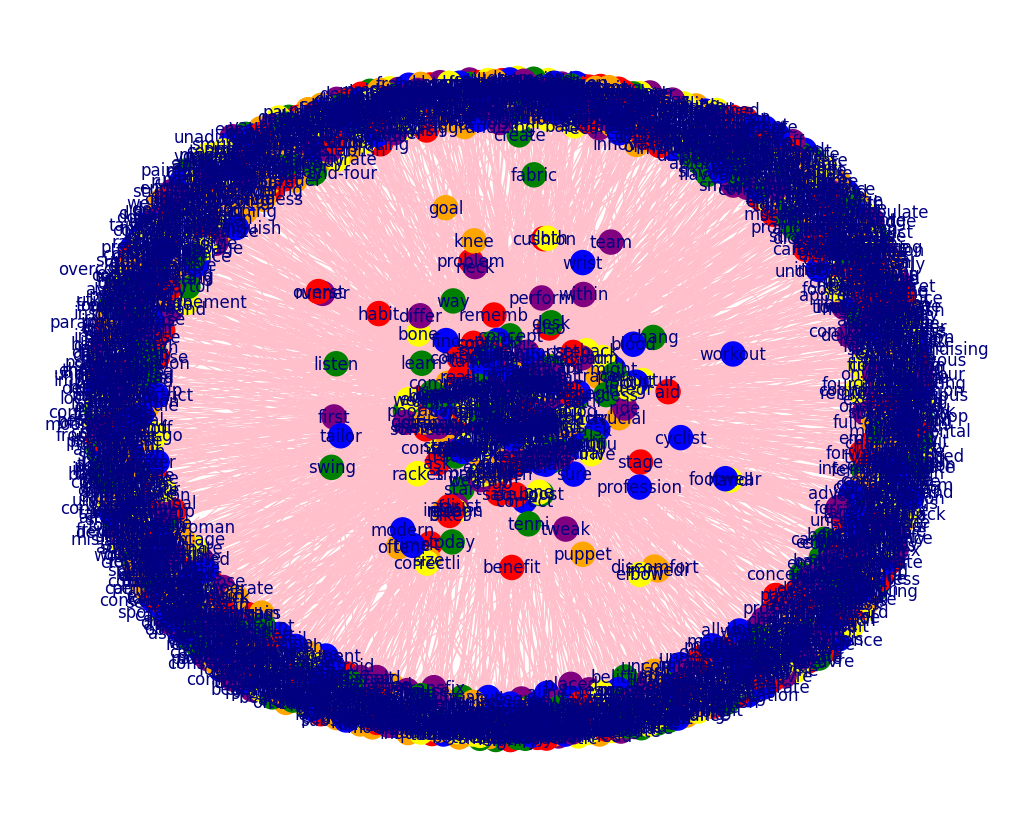

In [51]:
plt.figure(figsize=(10, 8),facecolor='black')  # Set the figure size
pos = nx.spring_layout(G)  # Positioning nodes using the spring layout
node_colors = np.random.choice(['red', 'green', 'blue', 'yellow', 'orange', 'purple'], size=2120)

nx.draw(G, pos, with_labels=True, arrows=True, edge_color='pink', arrowstyle='->', arrowsize=15, node_color=node_colors, font_color='navy')

plt.show()

In [52]:
testData = {}
# List all files in the directory
directory = "Test"
files = os.listdir(directory)
# Read contents of each file
for file in files:
    if os.path.isfile(directory + "/" + file):
        with open(directory + "/" + file, 'r') as f:
            text = f.read().split("\n")
            title = text[1]
            title = title[7:]
            tempDict = dict()
            tempDict["Label"] = text[0]
            tempDict["Text"] = text[2]
            testData[title] = tempDict

In [53]:
for title, text in testData.items():
  preprocessedTokens = preprocessDocument(text["Text"])
  text["Text"] = tokensToGraph(preprocessedTokens)


In [54]:
print(testData)

{'Stock market today: futures mixed ahead of JPMorgan, BlackRock earnings': {'Label': 'Business and Finance', 'Text': <networkx.classes.digraph.DiGraph object at 0x7fa77446ec20>}, '8 Ways To Improve Patient Care Quality': {'Label': 'Health and Fitness', 'Text': <networkx.classes.digraph.DiGraph object at 0x7fa7725cb8b0>}, "Jamie Dimon warns that markets are 'too happy' and failing to price in a possible US downturn": {'Label': 'Business and Finance', 'Text': <networkx.classes.digraph.DiGraph object at 0x7fa7770cb550>}, 'Quality In A Cup: 5 Influential Aspects Of Coffee Making': {'Label': 'Food', 'Text': <networkx.classes.digraph.DiGraph object at 0x7fa775005120>}, 'Choosing The Perfect Cooking Class For You': {'Label': 'Food', 'Text': <networkx.classes.digraph.DiGraph object at 0x7fa7742a6d70>}, 'Health Benefits Of Cycling': {'Label': 'Health and Fitness', 'Text': <networkx.classes.digraph.DiGraph object at 0x7fa7756f17b0>}}


In [58]:
G=text["Text"]
print(G)


DiGraph with 1433 nodes and 2075 edges


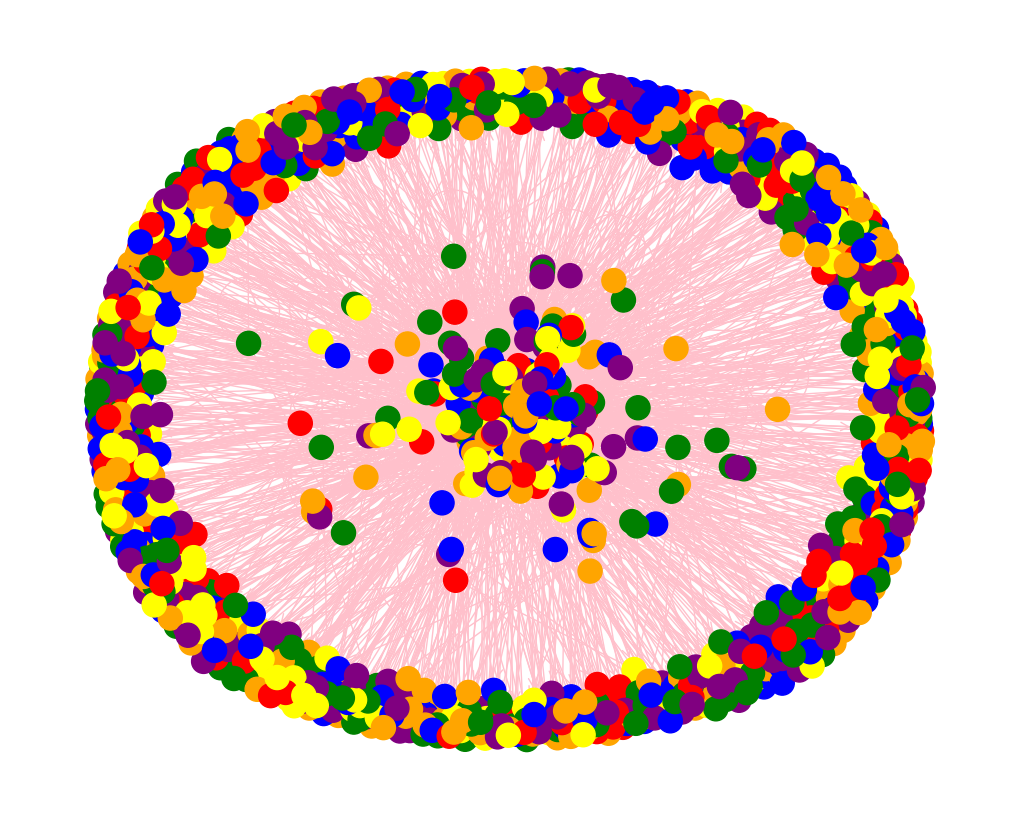

In [61]:
plt.figure(figsize=(10, 8),facecolor='black')  # Set the figure size
pos = nx.spring_layout(G)  # Positioning nodes using the spring layout
node_colors = np.random.choice(['red', 'green', 'blue', 'yellow', 'orange', 'purple'], size=1433)

nx.draw(G, pos, with_labels=False, arrows=True, edge_color='pink', arrowstyle='->', arrowsize=15, node_color=node_colors, font_color='navy')

plt.show()

In [70]:
train = trainData
# print(train)
test = testData
model = KNN(train, test, 5)
print(model)

{'Stock market today: futures mixed ahead of JPMorgan, BlackRock earnings': 'Business and Finance', '8 Ways To Improve Patient Care Quality': 'Health and Fitness', "Jamie Dimon warns that markets are 'too happy' and failing to price in a possible US downturn": 'Business and Finance', 'Quality In A Cup: 5 Influential Aspects Of Coffee Making': 'Health and Fitness', 'Choosing The Perfect Cooking Class For You': 'Food', 'Health Benefits Of Cycling': 'Health and Fitness'}


In [64]:
print(type(model))

<class 'dict'>


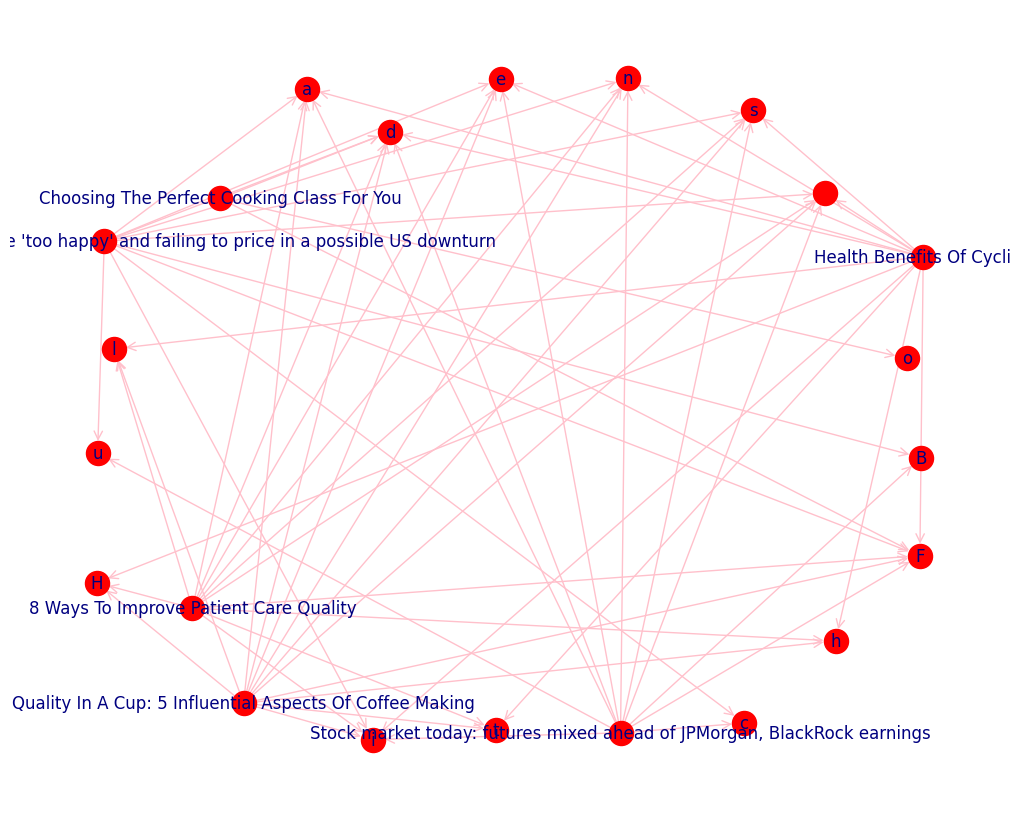

In [79]:
data = model

G = nx.DiGraph()

# Add edges from the dictionary
for source, targets in data.items():
    for target in targets:
        G.add_edge(source, target)

plt.figure(figsize=(10, 8),facecolor='black')  # Set the figure size
pos = nx.spring_layout(G,k=10)  # Positioning nodes using the spring layout
node_colors = np.random.choice(['red', 'green', 'blue', 'yellow', 'orange', 'purple'])

nx.draw(G, pos, with_labels=True, arrows=True, edge_color='pink', arrowstyle='->', arrowsize=15, node_color=node_colors, font_color='navy')

plt.show()

In [80]:
correct = 0
wrong = 0
total = len(testData)
for model_title, model_label in model.items():
  for test_title, text in testData.items():
    if model_title == test_title:
      if model_label == text["Label"]:
        correct = correct + 1
      else:
        print(model_title)
        wrong = wrong + 1

print("Total Test Data: ", total)
print("Correctly Classified: ", correct)
print("Misclassified: ", wrong)
print("Accuracy: "+ str(correct/total * 100.0) + " %")


Quality In A Cup: 5 Influential Aspects Of Coffee Making
Total Test Data:  6
Correctly Classified:  5
Misclassified:  1
Accuracy: 83.33333333333334 %
